In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("london_merged.csv")

In [3]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
data.shape

(17414, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
data["wind_speed"].describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: wind_speed, dtype: float64

In [8]:
data["wind_speed"].mean()

15.913063244133076

In [9]:
data["wind_speed"].median()

15.0

<AxesSubplot:>

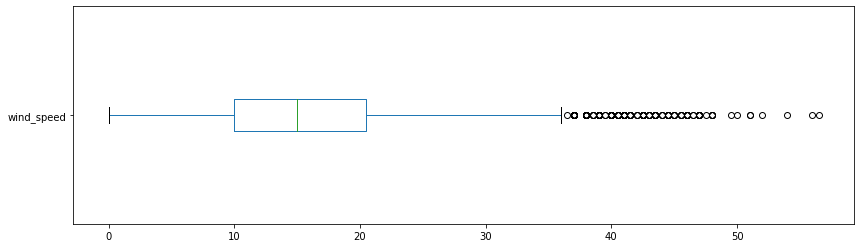

In [10]:
data["wind_speed"].plot(kind = 'box', vert = False, figsize = (14,4))

<AxesSubplot:ylabel='Density'>

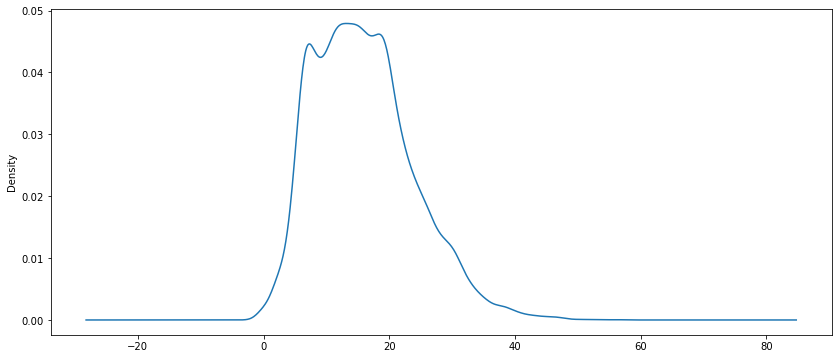

In [11]:
data["wind_speed"].plot(kind = "density", figsize = (14, 6))

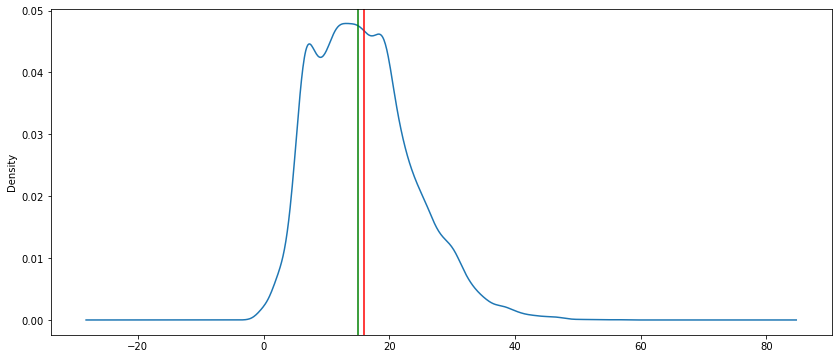

In [12]:
ax = data["wind_speed"].plot(kind = "density", figsize = (14, 6))
ax.axvline(data["wind_speed"].mean(), color = 'red')
ax.axvline(data["wind_speed"].median(), color = 'green')

Text(0.5, 0, 'Wind Speed')

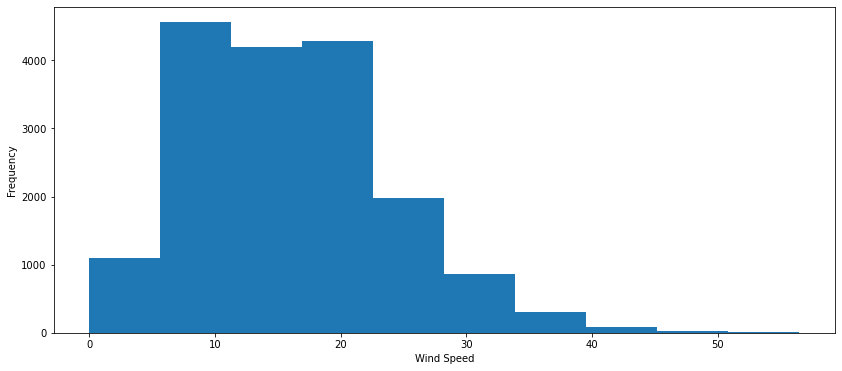

In [13]:
ax = data["wind_speed"].plot(kind='hist', figsize = (14, 6))
ax.set_ylabel('Frequency')
ax.set_xlabel('Wind Speed')

In [14]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [15]:
data["weather_code"].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

<AxesSubplot:ylabel='weather_code'>

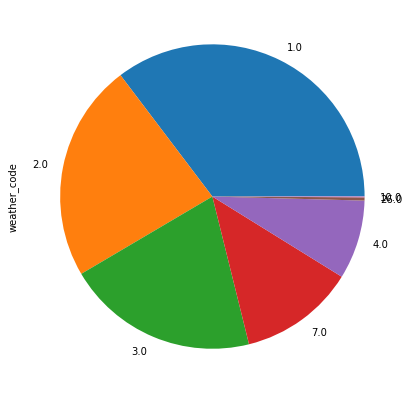

In [16]:
data["weather_code"].value_counts().plot(kind = 'pie', figsize = (7,7))

Text(0, 0.5, 'Frequency')

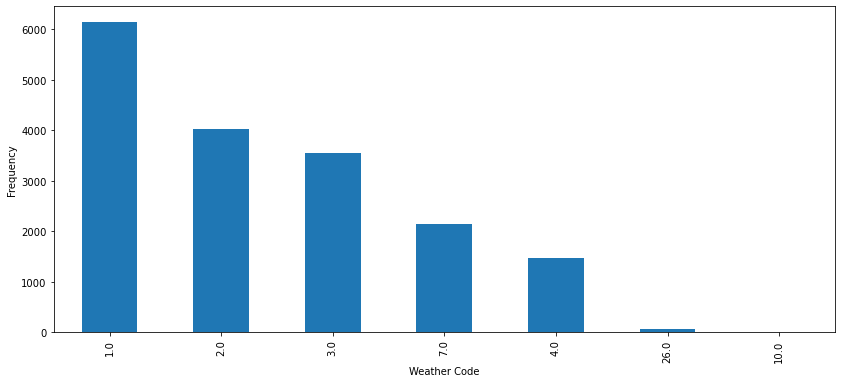

In [17]:
ax = data["weather_code"].value_counts().plot(kind = 'bar', figsize = (14,6))
ax.set_xlabel("Weather Code")
ax.set_ylabel("Frequency")

In [18]:
corr = data.corr()

corr

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000


([<matplotlib.axis.YTick at 0x2e863bb1550>,
 [Text(0, 0, 'cnt'),
  Text(0, 1, 't1'),
  Text(0, 2, 't2'),
  Text(0, 3, 'hum'),
  Text(0, 4, 'wind_speed'),
  Text(0, 5, 'weather_code'),
  Text(0, 6, 'is_holiday'),
  Text(0, 7, 'is_weekend'),
  Text(0, 8, 'season')])

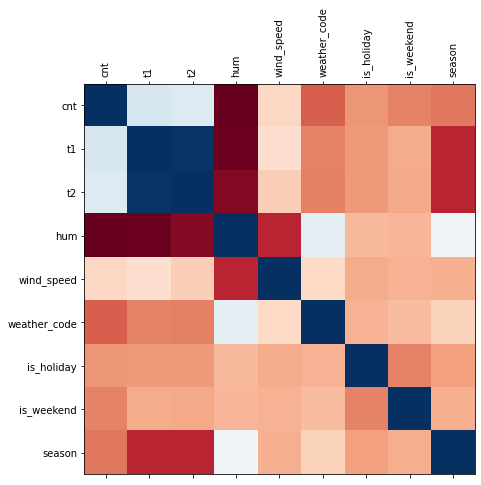

In [19]:
fig = plt.figure(figsize = (7,7))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = "vertical")
plt.yticks(range(len(corr.columns)), corr.columns)

<AxesSubplot:xlabel='wind_speed', ylabel='hum'>

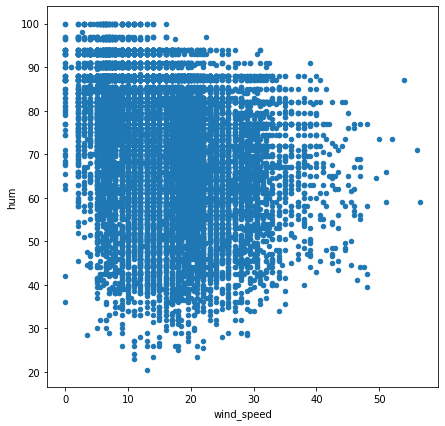

In [20]:
data.plot(kind = 'scatter', x = 'wind_speed', y = 'hum', figsize = (7,7))

Text(0.5, 0, 'season')

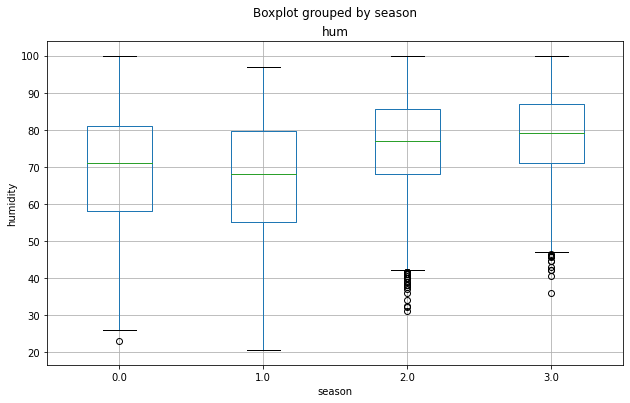

In [21]:
ax = data[['hum', 'season']].boxplot(by = 'season', figsize = (10,6))
ax.set_ylabel("humidity")
ax.set_xlabel("season")

hum                AxesSubplot(0.125,0.536818;0.168478x0.343182)
season          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
wind_speed      AxesSubplot(0.529348,0.536818;0.168478x0.343182)
t1              AxesSubplot(0.731522,0.536818;0.168478x0.343182)
t2                    AxesSubplot(0.125,0.125;0.168478x0.343182)
is_holiday         AxesSubplot(0.327174,0.125;0.168478x0.343182)
is_weekend         AxesSubplot(0.529348,0.125;0.168478x0.343182)
weather_code       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

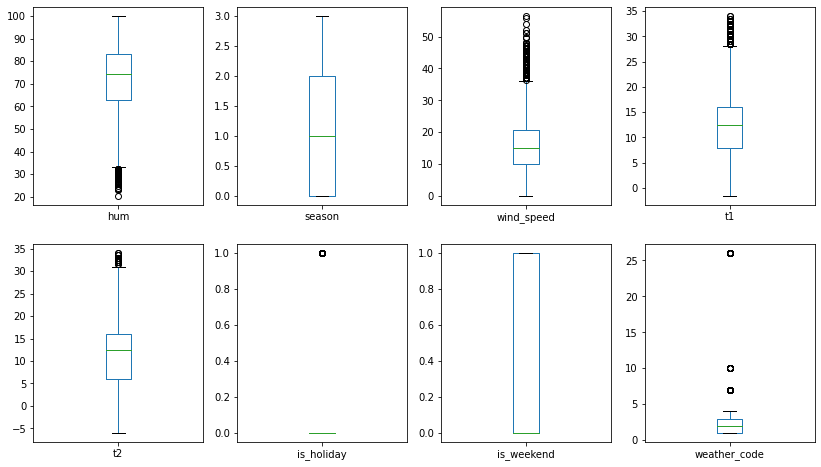

In [22]:
boxplot_cols = ["hum", "season", "wind_speed", "t1", "t2", "is_holiday", "is_weekend", "weather_code"]

data[boxplot_cols].plot(kind = 'box', subplots = True, layout = (2,4), figsize = (14,8))

In [23]:
data["nonsense_math"] = data["hum"] / data["wind_speed"]

data["nonsense_math"].head().round(2)

0    15.50
1    18.60
2      inf
3      inf
4    14.31
Name: nonsense_math, dtype: float64

<AxesSubplot:xlabel='nonsense_math', ylabel='t2'>

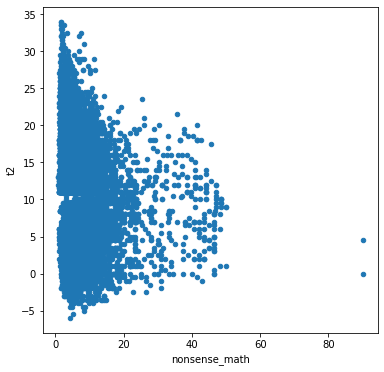

In [24]:
data.plot(kind = 'scatter', x = 'nonsense_math', y = 't2', figsize = (6,6))

<AxesSubplot:xlabel='nonsense_math', ylabel='t2'>

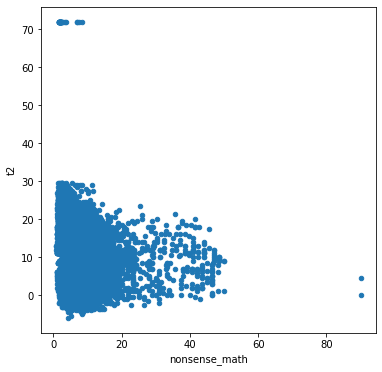

In [25]:
data.loc[(data["t2"] >= 30), 't2'] = 72

data.plot(kind = 'scatter', x = 'nonsense_math', y = 't2', figsize = (6,6))

In [28]:
# data[np.isfinite(data['nonsense_math'])]

# plt.hist(data[np.isfinite(data['nonsense_math'])].values)
# plt.show()

In [30]:
data["t2"].head()

0    2.060
1    2.575
2    2.575
3    2.060
4    0.000
Name: t2, dtype: float64

In [31]:
data["t2"] *= 1.03

data["t2"].head()

0    2.12180
1    2.65225
2    2.65225
3    2.12180
4    0.00000
Name: t2, dtype: float64

In [33]:
data.loc[data["season"] == 3]

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,nonsense_math
0,2015-01-04 00:00:00,182,3.0,2.12180,93.0,6.0,3.0,0.0,1.0,3.0,15.500000
1,2015-01-04 01:00:00,138,3.0,2.65225,93.0,5.0,1.0,0.0,1.0,3.0,18.600000
2,2015-01-04 02:00:00,134,2.5,2.65225,96.5,0.0,1.0,0.0,1.0,3.0,inf
3,2015-01-04 03:00:00,72,2.0,2.12180,100.0,0.0,1.0,0.0,1.0,3.0,inf
4,2015-01-04 04:00:00,47,2.0,0.00000,93.0,6.5,1.0,0.0,1.0,3.0,14.307692
...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.06090,81.0,19.0,3.0,0.0,0.0,3.0,4.263158
17410,2017-01-03 20:00:00,541,5.0,1.06090,81.0,21.0,4.0,0.0,0.0,3.0,3.857143
17411,2017-01-03 21:00:00,337,5.5,1.59135,78.5,24.0,4.0,0.0,0.0,3.0,3.270833
17412,2017-01-03 22:00:00,224,5.5,1.59135,76.0,23.0,4.0,0.0,0.0,3.0,3.304348


In [34]:
data.loc[data["season"] == 2, 't1'].mean()

13.039236191804168

In [38]:
data.loc[(data["season"] == 2) & (data["t1"] == 13), 'wind_speed'].median()

12.0

In [41]:
data["t1"].head()

0    3.0
1    3.0
2    2.5
3    2.0
4    2.0
Name: t1, dtype: float64

In [44]:
data.loc[data["season"] == 3, "t1"] *= 1.5

data["t1"].head()

0    4.50
1    4.50
2    3.75
3    3.00
4    3.00
Name: t1, dtype: float64